In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Seperate data csv and making the dataset

**#-|Imagined Movement  Analysis**

|-Delivered-Data details-|
Number of datapoint=240,Number of features =204, Number of Labels=240


|- First Level Cross-Validation-|
fold-1,Train-features:(200, 204),Test-features:(40, 204)
|-2nd Level Cross-Validation- of 1st level-fold-1|
Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC(C=100.0, gamma=1, kernel='linear')
Best-Lemda=0.01


fold-2,Train-features:(200, 204),Test-features:(40, 204)
|-2nd Level Cross-Validation- of 1st level-fold-2|
Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC(C=100.0, gamma=1, kernel='linear')
Best-Lemda=0.01


fold-3,Train-features:(200, 204),Test-features:(40, 204)
|-2nd Level Cross-Validation- of 1st level-fold-3|
Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC(C=100.0, gamma=1, kernel='linear')
Best-Lemda=0.01


fold-4,Train-features:(200, 204),Test-features:(40, 204)
|-2nd Level Cross-Validation- of 1st level-fold-4|
Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC(C=100.0, gamma=1

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SVC(C=100.0, gamma=1, kernel='linear')
Best-Lemda=0.01




|---First-Level Cross validation Accuracy with Threshold (beta)=0
CV accracy=0.5, fold1 acc=0.5,fold2 acc=0.5,fold3 acc=0.5,fold4 acc=0.5,fold5 acc=0.5,fold6 acc=0.5


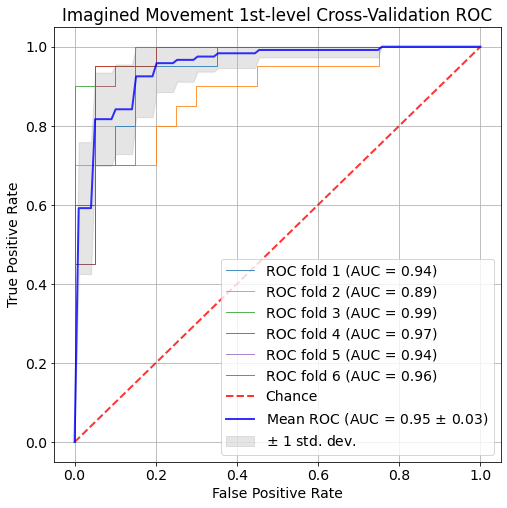

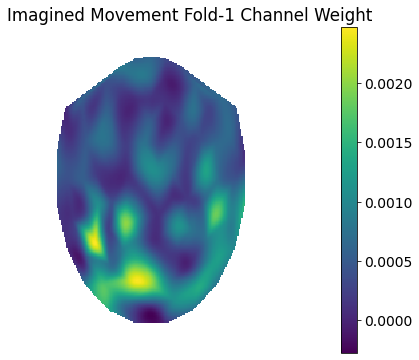

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


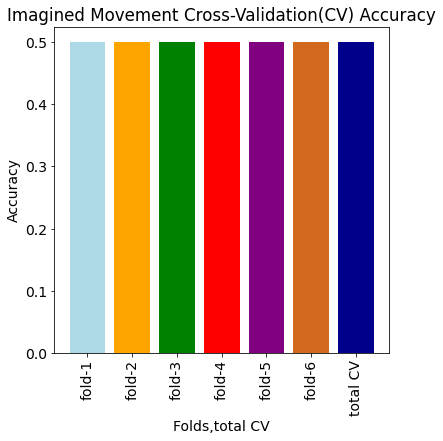

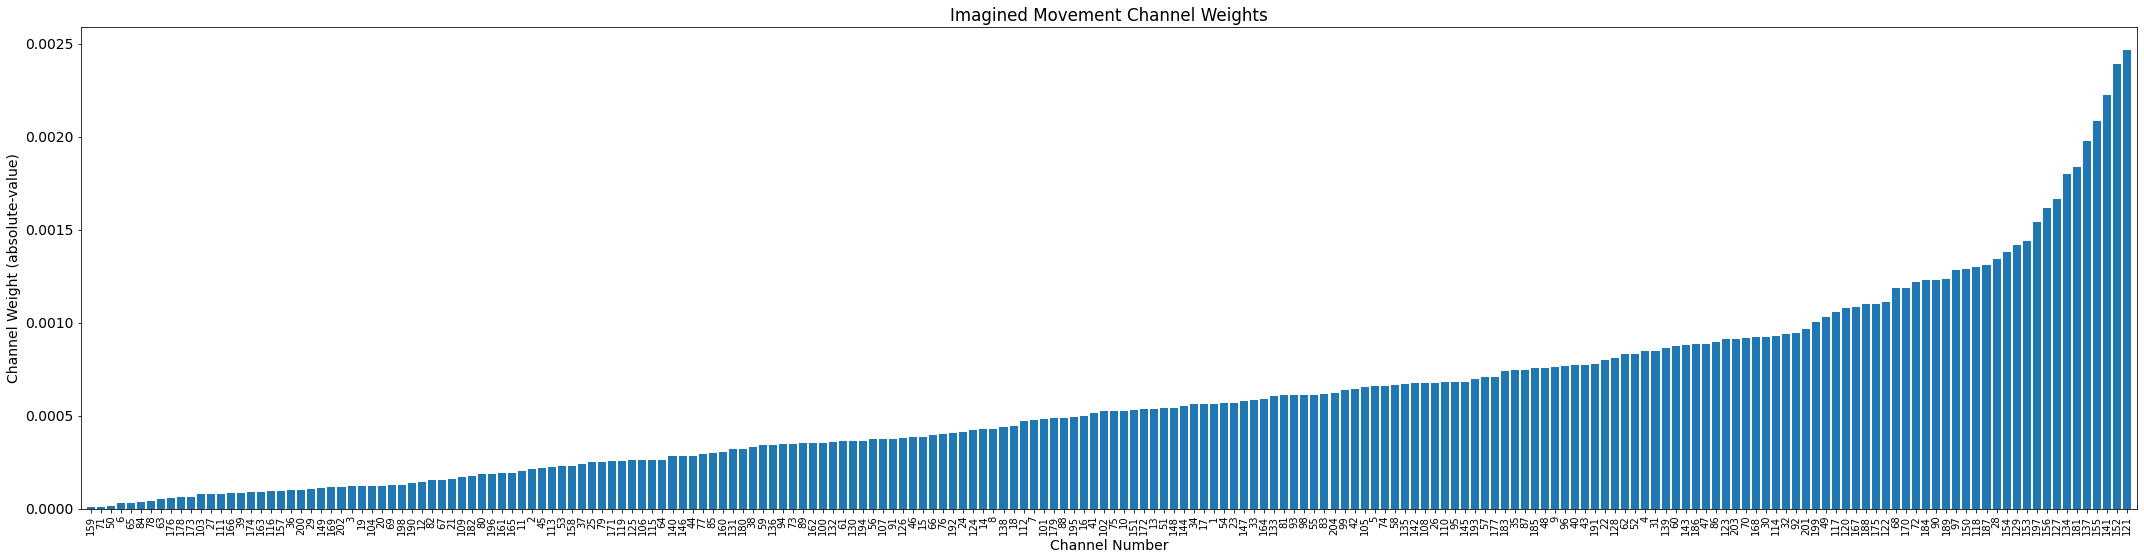

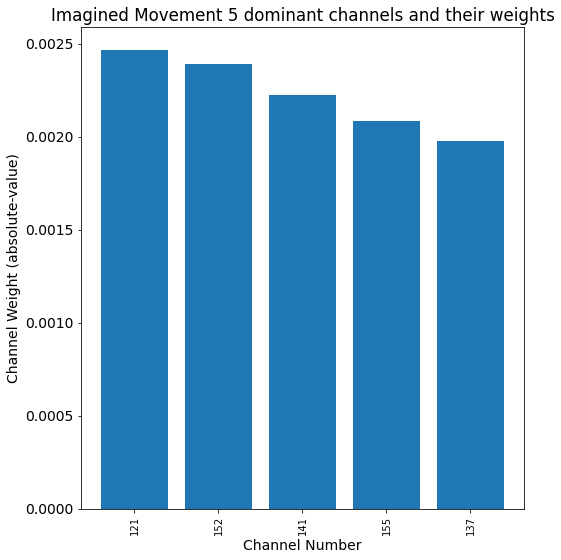

In [ ]:
#--Import libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay,auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold,GridSearchCV
import scipy.io
import scipy.interpolate
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

#--------------------- Function------------------------

def show_chanWeights(chanVal,name):
	matlab_offset = 1

	selNum = np.asarray(range(1,306))
	cortIX = np.where(np.mod(selNum, 3)!=0)
	selNum = selNum[cortIX]

	resolution = 200

	# Load sensor location
	#load sensors102.mat
	mat = scipy.io.loadmat('/content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/MP2/sensors102.mat')
	c102 = mat['c102']
	x = c102[:, 2 - matlab_offset]
	y = c102[:, 3 - matlab_offset]
	xlin = np.linspace(min(x), max(x) + 35, resolution)
	ylin = np.linspace(min(y), max(y), resolution)
	r = 5

	MinChanVal = min(chanVal)
	z = np.ones(len(x)) * MinChanVal

	selSen = np.ceil(selNum / 3)

	maxSen = int(max(selSen))
	for senIX in range(1, maxSen):
		currVal = np.zeros(2)
		for chanIX in range(1, 2):
			chanInd = (senIX - 1) * 3 + chanIX
			tmp = np.where(selNum == chanInd)
			if len(tmp) != 0:
				currVal[chanIX - matlab_offset] = chanVal[tmp]
		z[senIX] = max(currVal)

	X, Y = np.meshgrid(xlin, ylin)
	Z = scipy.interpolate.griddata((x, y), z, (X, Y), method='cubic')
	#pcm = plt.pcolor([X, Y], Z)
	plt.pcolor(Z)
	plt.axis('equal')  # ax.axis('equal')
	plt.axis('off')
	plt.colorbar()
	plt.savefig(name,bbox_inches="tight",dpi=170)
	plt.show()




#######################################################

def Mini_project2(Features,Labels,Accuracy_Beta=0,Number_of_1stlevel_cv=6,RandomState=200,Shuffle=True,AUC_picture_name='Imagined_Movement_1stLevel-CV_AUC.png',move_ment_type='Imagined Movement'):
  

  Classifier_list=[]
  number_of_data_point,number_of_features=Features.shape
  print('|-Delivered-Data details-|')
  print('Number of datapoint={},Number of features ={}, Number of Labels={}'.format(number_of_data_point,number_of_features,len(Labels)))
  print('\n')

  print('|- First Level Cross-Validation-|')
  First_level_CrossValidation = StratifiedKFold(n_splits=Number_of_1stlevel_cv,random_state=RandomState,shuffle=Shuffle)
  param_grid = {'C': [1/0.01,1/1,1/100,1/10000], 'gamma': [1,0.1,0.01,0.001]}
  tprs = []
  aucs = []

  #---For the fold Accuracy
  folds_ytrue         = []
  folds_predict_class = []
  folds_accuracy_list = []


  


  #-----AUC plots------#
  mean_fpr = np.linspace(0, 1, 100)
  plt.figure(figsize=(8, 8))
  ax  = plt.subplot(1,1,1)
  for cv_1stlvl_i, (train_index_1stlvl, test_index_1stlvl) in enumerate(First_level_CrossValidation.split(Features,Labels)):
    X_Train = Features[train_index_1stlvl]
    X_Test  = Features[test_index_1stlvl]

    Y_Train = Labels[train_index_1stlvl]
    Y_Test  = Labels[test_index_1stlvl]
    print('fold-{},Train-features:{},Test-features:{}'.format(cv_1stlvl_i+1,X_Train.shape,X_Test.shape))
    print('|-2nd Level Cross-Validation- of 1st level-fold-{}|'.format(cv_1stlvl_i+1))

    grid = GridSearchCV(SVC(kernel='linear'),param_grid,refit=True,verbose=1,cv= 5)
    grid.fit(X_Train,Y_Train)
    #----best parameters
    print(grid.best_estimator_)
    best_lemda = 1/grid.best_params_['C']
    best_gama  = grid.best_params_['gamma']
    print('Best-Lemda={}'.format(best_lemda))


    Classifier= SVC(kernel='linear', C=best_lemda, gamma=best_gama,probability=True)
    Classifier.fit(X_Train,Y_Train)
    viz = RocCurveDisplay.from_estimator(
          Classifier,
          X_Test,
          Y_Test,
          name="ROC fold {}".format(cv_1stlvl_i+1),
          alpha=0.8,
          lw=1,
          ax=ax
      )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    #-----Fold Accuracy-----
    fold_y_pred_pos   = Classifier.predict_proba(X_Test)[:,1]
    fold_y_pred_class = fold_y_pred_pos > Accuracy_Beta
    fold_accuracy     = accuracy_score(Y_Test, fold_y_pred_class)
    
    folds_ytrue.append(Y_Test)
    folds_predict_class.append(fold_y_pred_class)
    folds_accuracy_list.append(fold_accuracy)
    Classifier_list.append(Classifier)
    print('\n')
    



  ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr,mean_tpr,color="b",label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),lw=2,alpha=0.8)
  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=0.2,label=r"$\pm$ 1 std. dev.")
  ax.set(xlim=[-0.05, 1.05],ylim=[-0.05, 1.05],title=move_ment_type+" 1st-level Cross-Validation ROC")
  ax.legend(loc="lower right")
  ax.set_ylabel('True Positive Rate')
  ax.set_xlabel('False Positive Rate')
  plt.grid()
  plt.savefig(AUC_picture_name,bbox_inches="tight",dpi=170)
  print('\n')
  ##------ Overall Cross-validation Accuracy
  cv_ytrue     = [j for i in folds_ytrue for j in i]
  cv_predClass = [j for i in folds_predict_class for j in i]

  cv_accuracy = accuracy_score(cv_ytrue, cv_predClass)
  folds_accuracy_list.append(cv_accuracy)
  
  print('|---First-Level Cross validation Accuracy with Threshold (beta)=0')
  print('CV accracy={}, fold1 acc={},fold2 acc={},fold3 acc={},fold4 acc={},fold5 acc={},fold6 acc={}'.format(cv_accuracy,folds_accuracy_list[0],
                                                                                                              folds_accuracy_list[1],
                                                                                                              folds_accuracy_list[2],
                                                                                                              folds_accuracy_list[3],
                                                                                                              folds_accuracy_list[4],
                                                                                                              folds_accuracy_list[5]))

  
  #---- Fold-1 Class weight--------
  plt.figure(figsize=(6, 6))
  plt.title(move_ment_type+' Fold-1 Channel Weight')
  show_chanWeights(abs(Classifier_list[0].coef_.ravel()),move_ment_type+'Fold-1_Channelwights.png')


  plt.figure(figsize=(6, 6))
  plt.title(move_ment_type+' Cross-Validation(CV) Accuracy')
  plt.bar(range(0,len(folds_accuracy_list)),folds_accuracy_list,color=['lightblue', 'orange', 'green', 'red','purple','#D2691E','darkblue'],align='center')
  plt.xticks(range(0,len(folds_accuracy_list)),['fold-1','fold-2','fold-3','fold-4','fold-5','fold-6','total CV',],rotation =90)
  plt.ylabel('Accuracy')
  plt.xlabel('Folds,total CV')
  plt.savefig(move_ment_type+'_Cross-Validation(CV)_Accuracy',bbox_inches="tight",dpi=170)

  #-------Features weights and Dominating weights visualization------
  Channel_name_list =[]
  for i in range(0,204):
    channel_name='{}'.format(i+1)
    Channel_name_list.append(channel_name)

  Fold_1_Coeffient_absolute = abs(Classifier_list[0].coef_[0])
  Fold_1_Coeffient_absolute_sorted,Fold_1_Coeffient_absolute_names = zip(*sorted(zip(Fold_1_Coeffient_absolute,Channel_name_list)))



  plt.figure(figsize=(30, 8))
  plt.bar(range(0,len(Fold_1_Coeffient_absolute_names)),Fold_1_Coeffient_absolute_sorted,align='center')
  plt.xticks(range(0,len(Fold_1_Coeffient_absolute_names)),Fold_1_Coeffient_absolute_names,rotation =90,fontsize=10)
  plt.ylabel('Channel Weight (absolute-value)',fontsize=14)
  plt.xlabel('Channel Number',fontsize=14)
  plt.xlim((-1,204))
  plt.title(move_ment_type+' Channel Weights')
  plt.tight_layout()
  plt.savefig(move_ment_type+'_Channel-Weights.png',bbox_inches="tight",dpi=170)


  #---- Top 5

  Fold_1_Coeffient_absolute = abs(Classifier_list[0].coef_[0])
  Fold_1_Coeffient_absolute_sorted,Fold_1_Coeffient_absolute_names = zip(*sorted(zip(Fold_1_Coeffient_absolute,Channel_name_list),reverse=True))
  Fold_1_Coeffient_absolute_sorted = Fold_1_Coeffient_absolute_sorted[0:5]
  Fold_1_Coeffient_absolute_names  = Fold_1_Coeffient_absolute_names[0:5]


  plt.figure(figsize=(8, 8))
  plt.bar(range(0,len(Fold_1_Coeffient_absolute_names)),Fold_1_Coeffient_absolute_sorted,align='center')
  plt.xticks(range(0,len(Fold_1_Coeffient_absolute_names)),Fold_1_Coeffient_absolute_names,rotation =90,fontsize=10)
  plt.ylabel('Channel Weight (absolute-value)',fontsize=14)
  plt.xlabel('Channel Number',fontsize=14)
  plt.title(move_ment_type+' 5 dominant channels and their weights')
  plt.tight_layout()
  plt.savefig(move_ment_type+'_5Channel-Weights.png',bbox_inches="tight",dpi=170)

  return Classifier_list,folds_accuracy_list,Fold_1_Coeffient_absolute_sorted,Fold_1_Coeffient_absolute_names




#Loading Data
raed_feaSubEImg_1=pd.read_csv('/content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/MP2/feaSubEImg_1.csv',header=None)
raed_feaSubEImg_2=pd.read_csv('/content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/MP2/feaSubEImg_2.csv',header=None)

#Transpose data
raed_feaSubEImg_1_transpose= raed_feaSubEImg_1.T
raed_feaSubEImg_2_transpose= raed_feaSubEImg_2.T


raed_feaSubEImg_1_transpose_labels=np.zeros(len(raed_feaSubEImg_1_transpose))
raed_feaSubEImg_2_transpose_labels=np.ones(len(raed_feaSubEImg_2_transpose))


DataX = np.concatenate((raed_feaSubEImg_1_transpose,raed_feaSubEImg_2_transpose), axis = 0)
DataY = np.concatenate((raed_feaSubEImg_1_transpose_labels,raed_feaSubEImg_2_transpose_labels), axis = 0)

Classifier_list,folds_accuracy_list,Fold_1_Coeffient_absolute_sorted,Fold_1_Coeffient_absolute_names=Mini_project2(Features=DataX,Labels=DataY,Accuracy_Beta=0.0,Number_of_1stlevel_cv=6,RandomState=200,Shuffle=True,AUC_picture_name='Imagined_Movement_1stLevel-CV_AUC.png',move_ment_type='Imagined Movement')

# Real

|-Delivered-Data details-|
Number of datapoint=240,Number of features =204, Number of Labels=240


|- First Level Cross-Validation-|
fold-1,Train-features:(200, 204),Test-features:(40, 204)
|-2nd Level Cross-Validation- of 1st level-fold-1|
Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC(C=100.0, gamma=1, kernel='linear')
Best-Lemda=0.01


fold-2,Train-features:(200, 204),Test-features:(40, 204)
|-2nd Level Cross-Validation- of 1st level-fold-2|
Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC(C=100.0, gamma=1, kernel='linear')
Best-Lemda=0.01


fold-3,Train-features:(200, 204),Test-features:(40, 204)
|-2nd Level Cross-Validation- of 1st level-fold-3|
Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC(C=100.0, gamma=1, kernel='linear')
Best-Lemda=0.01


fold-4,Train-features:(200, 204),Test-features:(40, 204)
|-2nd Level Cross-Validation- of 1st level-fold-4|
Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC(C=100.0, gamma=1

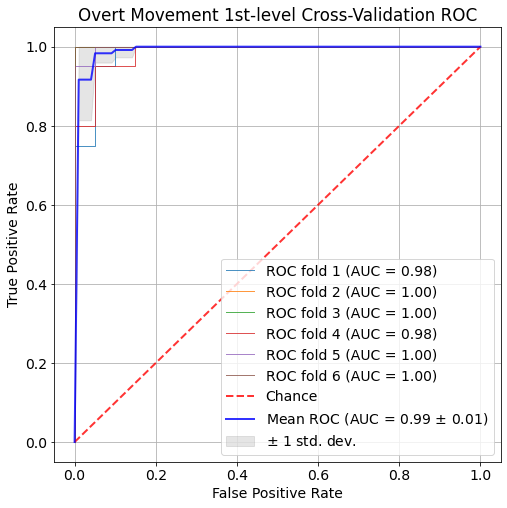

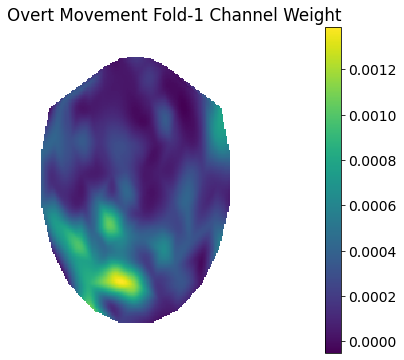

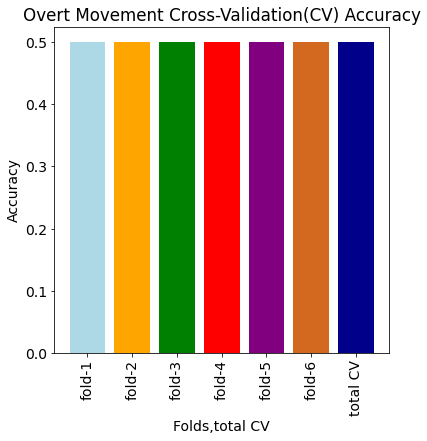

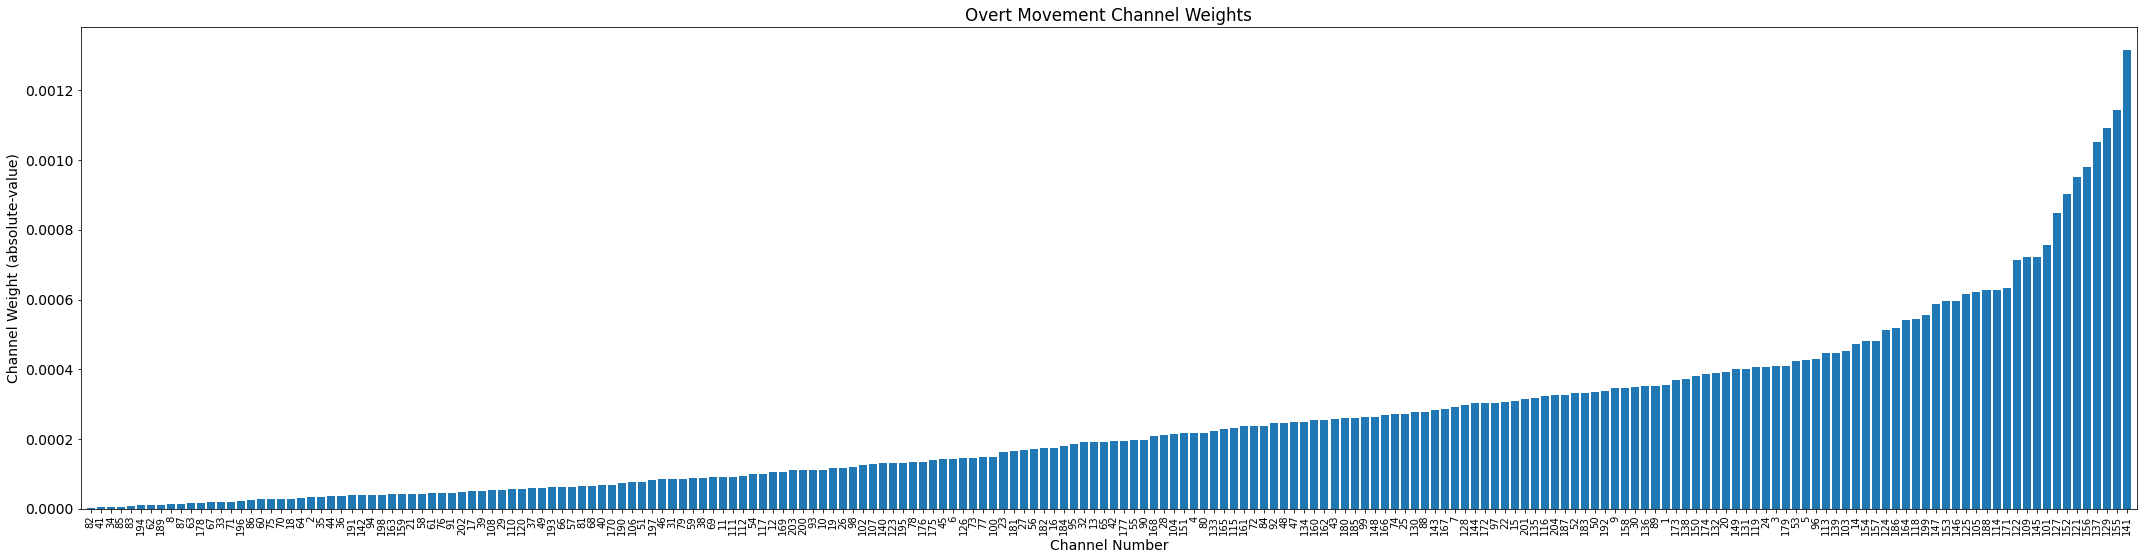

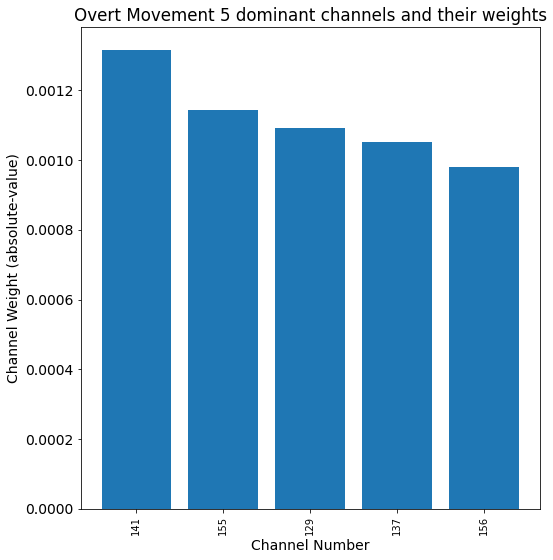

In [ ]:
#Loading Data
raed_feaSubEImg_1=pd.read_csv('/content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/MP2/feaSubEOvert_1.csv',header=None)
raed_feaSubEImg_2=pd.read_csv('/content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/MP2/feaSubEOvert_2.csv',header=None)

#Transpose data
raed_feaSubEImg_1_transpose= raed_feaSubEImg_1.T
raed_feaSubEImg_2_transpose= raed_feaSubEImg_2.T


raed_feaSubEImg_1_transpose_labels=np.zeros(len(raed_feaSubEImg_1_transpose))
raed_feaSubEImg_2_transpose_labels=np.ones(len(raed_feaSubEImg_2_transpose))


DataX = np.concatenate((raed_feaSubEImg_1_transpose,raed_feaSubEImg_2_transpose), axis = 0)
DataY = np.concatenate((raed_feaSubEImg_1_transpose_labels,raed_feaSubEImg_2_transpose_labels), axis = 0)

Classifier_list,folds_accuracy_list,Fold_1_Coeffient_absolute_sorted,Fold_1_Coeffient_absolute_names=Mini_project2(Features=DataX,Labels=DataY,Accuracy_Beta=0.0,Number_of_1stlevel_cv=6,RandomState=200,Shuffle=True,AUC_picture_name='Overt_Movement_1stLevel-CV_AUC.png',move_ment_type='Overt Movement')



|!jupyter nbconvert --to html /content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/MP2/MP2.ipynb